## Import Libraries

In [1]:
import requests as req
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Download Data

In [2]:
resp = req.get('https://services.arcgis.com/njFNhDsUCentVYJW/arcgis/rest/services/MASTERCaseTracker/FeatureServer/0/query?f=json&where=1%3D1&returnGeometry=false&spatialRel=esriSpatialRelIntersects&outFields=*&orderByFields=ReportDate%20asc&resultOffset=0&resultRecordCount=32000&resultType=standard&cacheHint=true')

In [3]:
rawData = resp.json()

## Fix Data

Convert NoneTypes to zeros.
Calculate case deltas from totals.

## Build Dataframe

In [4]:
covdf = pd.DataFrame(columns=[
    '0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 to 79','80 plus'
])

for i in range(0, len(rawData['features'])):
  idx = pd.to_datetime(rawData['features'][i]['attributes']["ReportDate"] * 1000000)
  #Fix NoneTypes
  if rawData['features'][i]['attributes']['case0to9'] is None:
    rawData['features'][i]['attributes']['case0to9'] = 0

  if rawData['features'][i]['attributes']['case10to19'] is None:
    rawData['features'][i]['attributes']['case10to19'] = 0

  if rawData['features'][i]['attributes']['case20to29'] is None:
    rawData['features'][i]['attributes']['case20to29'] = 0

  if rawData['features'][i]['attributes']['case30to39'] is None:
    rawData['features'][i]['attributes']['case30to39'] = 0
    
  if rawData['features'][i]['attributes']['case40to49'] is None:
    rawData['features'][i]['attributes']['case40to49'] = 0
    
  if rawData['features'][i]['attributes']['case50to59'] is None:
    rawData['features'][i]['attributes']['case50to59'] = 0
    
  if rawData['features'][i]['attributes']['case60to69'] is None:
    rawData['features'][i]['attributes']['case60to69'] = 0

  if rawData['features'][i]['attributes']['case70to79'] is None:
    rawData['features'][i]['attributes']['case70to79'] = 0

  if rawData['features'][i]['attributes']['case80plus'] is None:
    rawData['features'][i]['attributes']['case80plus'] = 0

    
  covdf.loc[idx] = [
      (rawData['features'][i]['attributes']['case0to9'] if i == 0 else rawData['features'][i]['attributes']['case0to9'] - rawData['features'][i - 1]['attributes']['case0to9']),
      (rawData['features'][i]['attributes']['case10to19'] if i == 0 else rawData['features'][i]['attributes']['case10to19'] - rawData['features'][i - 1]['attributes']['case10to19']),
      (rawData['features'][i]['attributes']['case20to29'] if i == 0 else rawData['features'][i]['attributes']['case20to29'] - rawData['features'][i - 1]['attributes']['case20to29']),
      (rawData['features'][i]['attributes']['case30to39'] if i == 0 else rawData['features'][i]['attributes']['case30to39'] - rawData['features'][i - 1]['attributes']['case30to39']),
      (rawData['features'][i]['attributes']['case40to49'] if i == 0 else rawData['features'][i]['attributes']['case40to49'] - rawData['features'][i - 1]['attributes']['case40to49']),
      (rawData['features'][i]['attributes']['case50to59'] if i == 0 else rawData['features'][i]['attributes']['case50to59'] - rawData['features'][i - 1]['attributes']['case50to59']),
      (rawData['features'][i]['attributes']['case60to69'] if i == 0 else rawData['features'][i]['attributes']['case60to69'] - rawData['features'][i - 1]['attributes']['case60to69']),
      (rawData['features'][i]['attributes']['case70to79'] if i == 0 else rawData['features'][i]['attributes']['case70to79'] - rawData['features'][i - 1]['attributes']['case70to79']),
      (rawData['features'][i]['attributes']['case80plus'] if i == 0 else rawData['features'][i]['attributes']['case80plus'] - rawData['features'][i - 1]['attributes']['case80plus'])
  ]

## Make Chart

<AxesSubplot:>

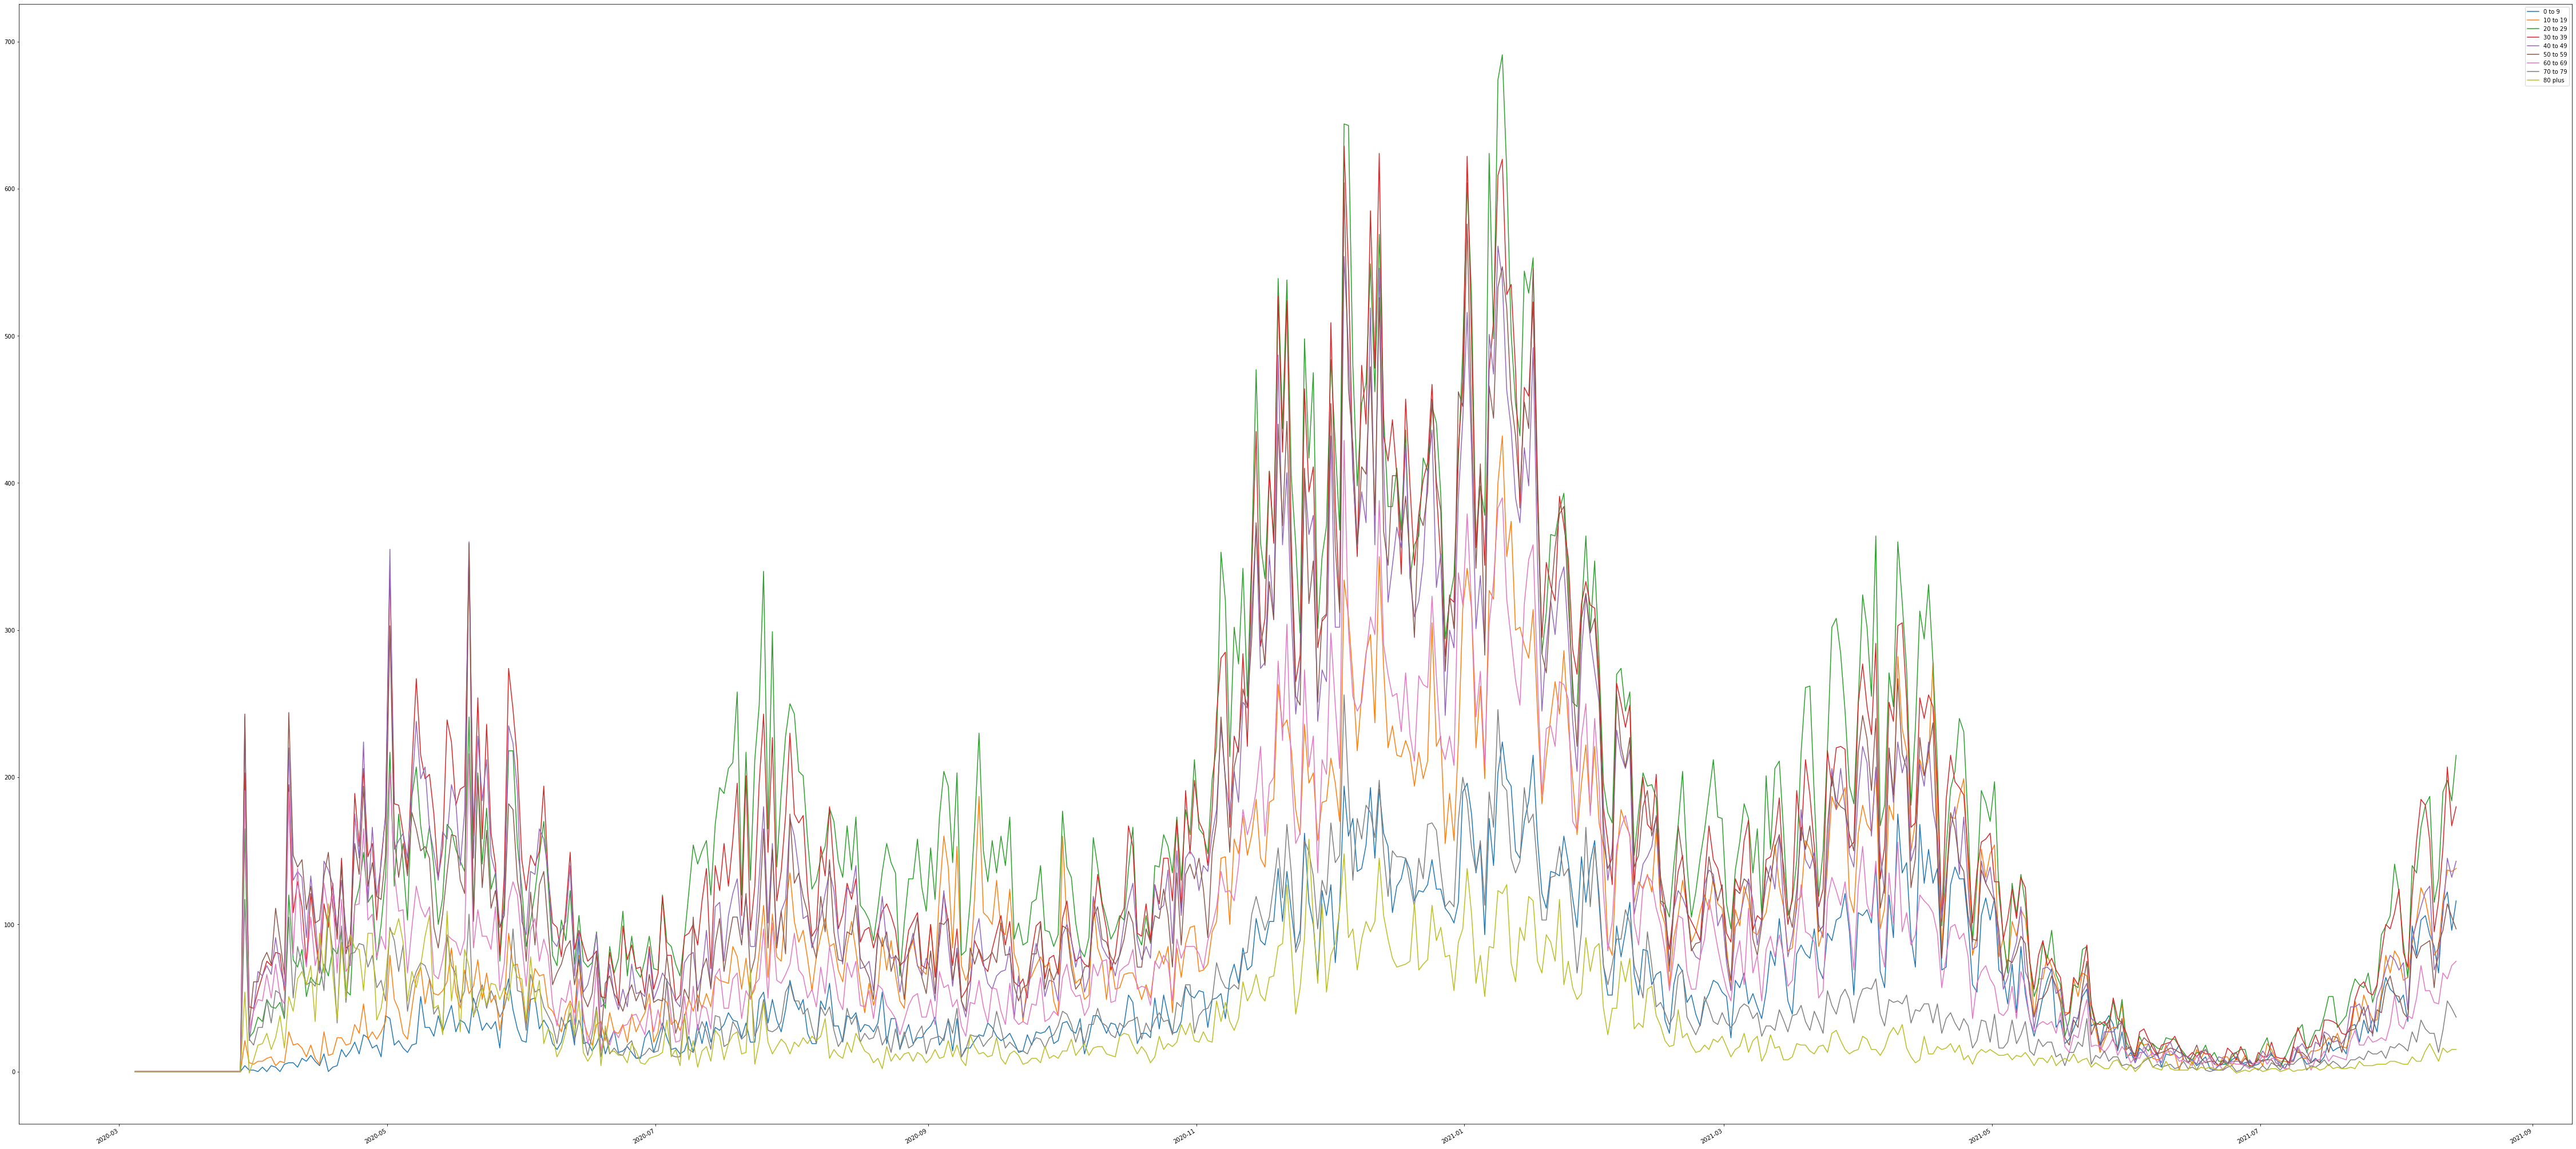

In [5]:
covdf.plot(figsize=(80, 40))

### That is an ugly chart!

<AxesSubplot:>

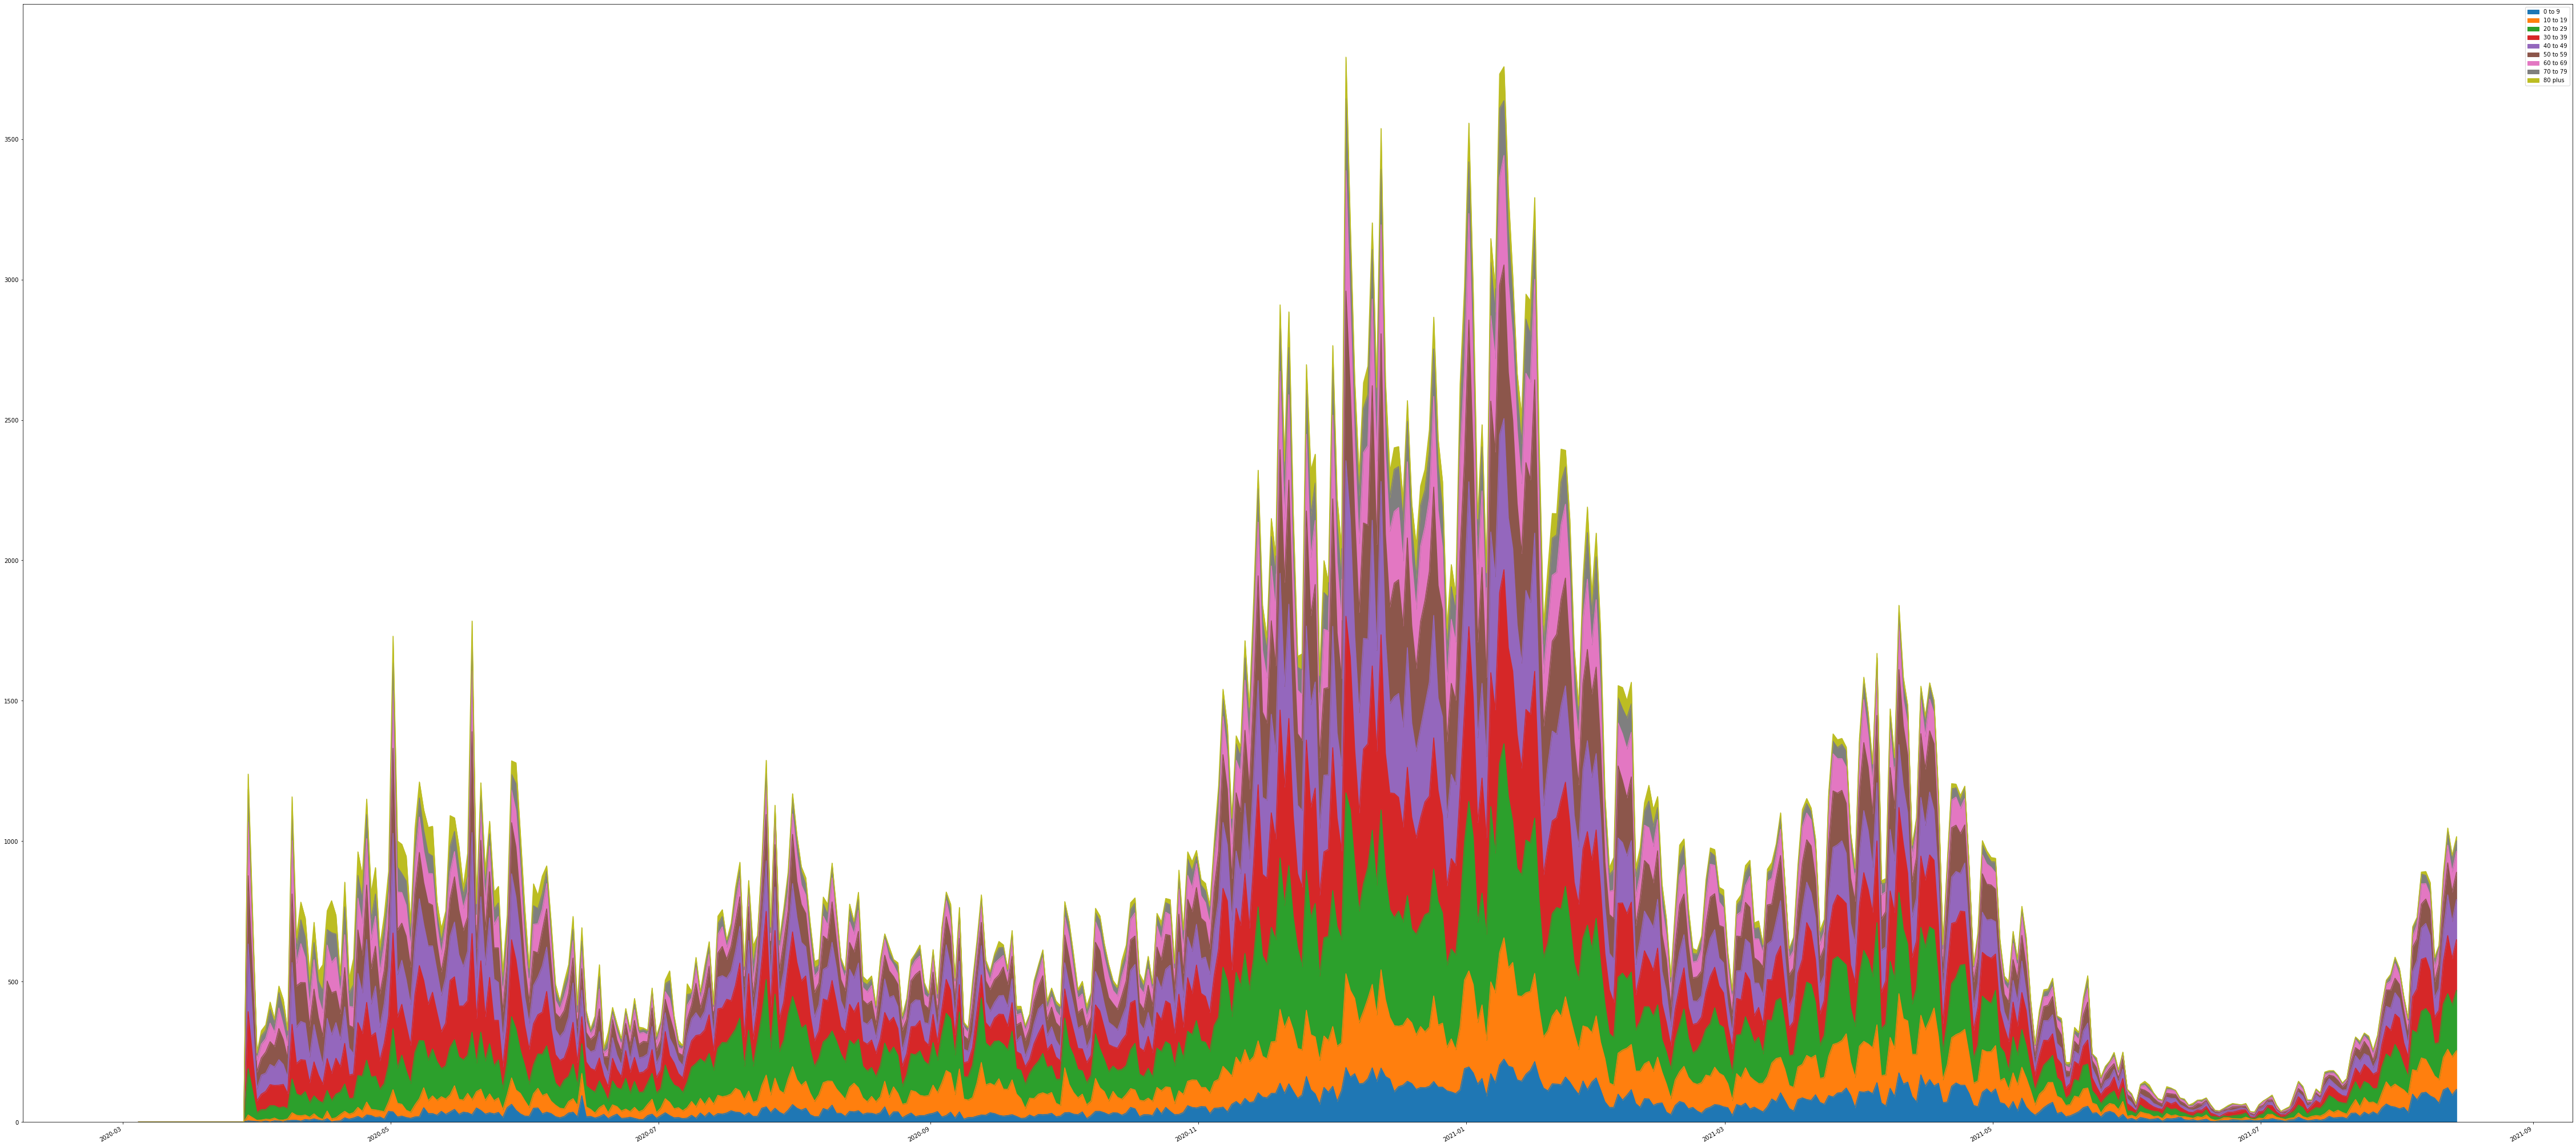

In [6]:
covdf[covdf["80 plus"] >= 0].plot.area(figsize=(80, 40))

## Is that better?

Maybe a little.

## Let's try something new!

Build dataframe with percent of new cases by age.

In [7]:
covdfp = pd.DataFrame(columns=[
    '0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 to 79','80 plus'
])

for i in range(0, len(rawData['features'])):
    if rawData['features'][i]['attributes']['CaseDelta'] > 0:
        idx = pd.to_datetime(rawData['features'][i]['attributes']["ReportDate"] * 1000000)
        covdfp.loc[idx] = [
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case0to9'] if i == 0 else (rawData['features'][i]['attributes']['case0to9'] - rawData['features'][i - 1]['attributes']['case0to9']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case10to19'] if i == 0 else (rawData['features'][i]['attributes']['case10to19'] - rawData['features'][i - 1]['attributes']['case10to19']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case20to29'] if i == 0 else (rawData['features'][i]['attributes']['case20to29'] - rawData['features'][i - 1]['attributes']['case20to29']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case30to39'] if i == 0 else (rawData['features'][i]['attributes']['case30to39'] - rawData['features'][i - 1]['attributes']['case30to39']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case40to49'] if i == 0 else (rawData['features'][i]['attributes']['case40to49'] - rawData['features'][i - 1]['attributes']['case40to49']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case50to59'] if i == 0 else (rawData['features'][i]['attributes']['case50to59'] - rawData['features'][i - 1]['attributes']['case50to59']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case60to69'] if i == 0 else (rawData['features'][i]['attributes']['case60to69'] - rawData['features'][i - 1]['attributes']['case60to69']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case70to79'] if i == 0 else (rawData['features'][i]['attributes']['case70to79'] - rawData['features'][i - 1]['attributes']['case70to79']) / rawData['features'][i]['attributes']['CaseDelta']),
          0 if rawData['features'][i]['attributes']['CaseDelta'] == 0 else (rawData['features'][i]['attributes']['case80plus'] if i == 0 else (rawData['features'][i]['attributes']['case80plus'] - rawData['features'][i - 1]['attributes']['case80plus']) / rawData['features'][i]['attributes']['CaseDelta'])
      ]

<AxesSubplot:>

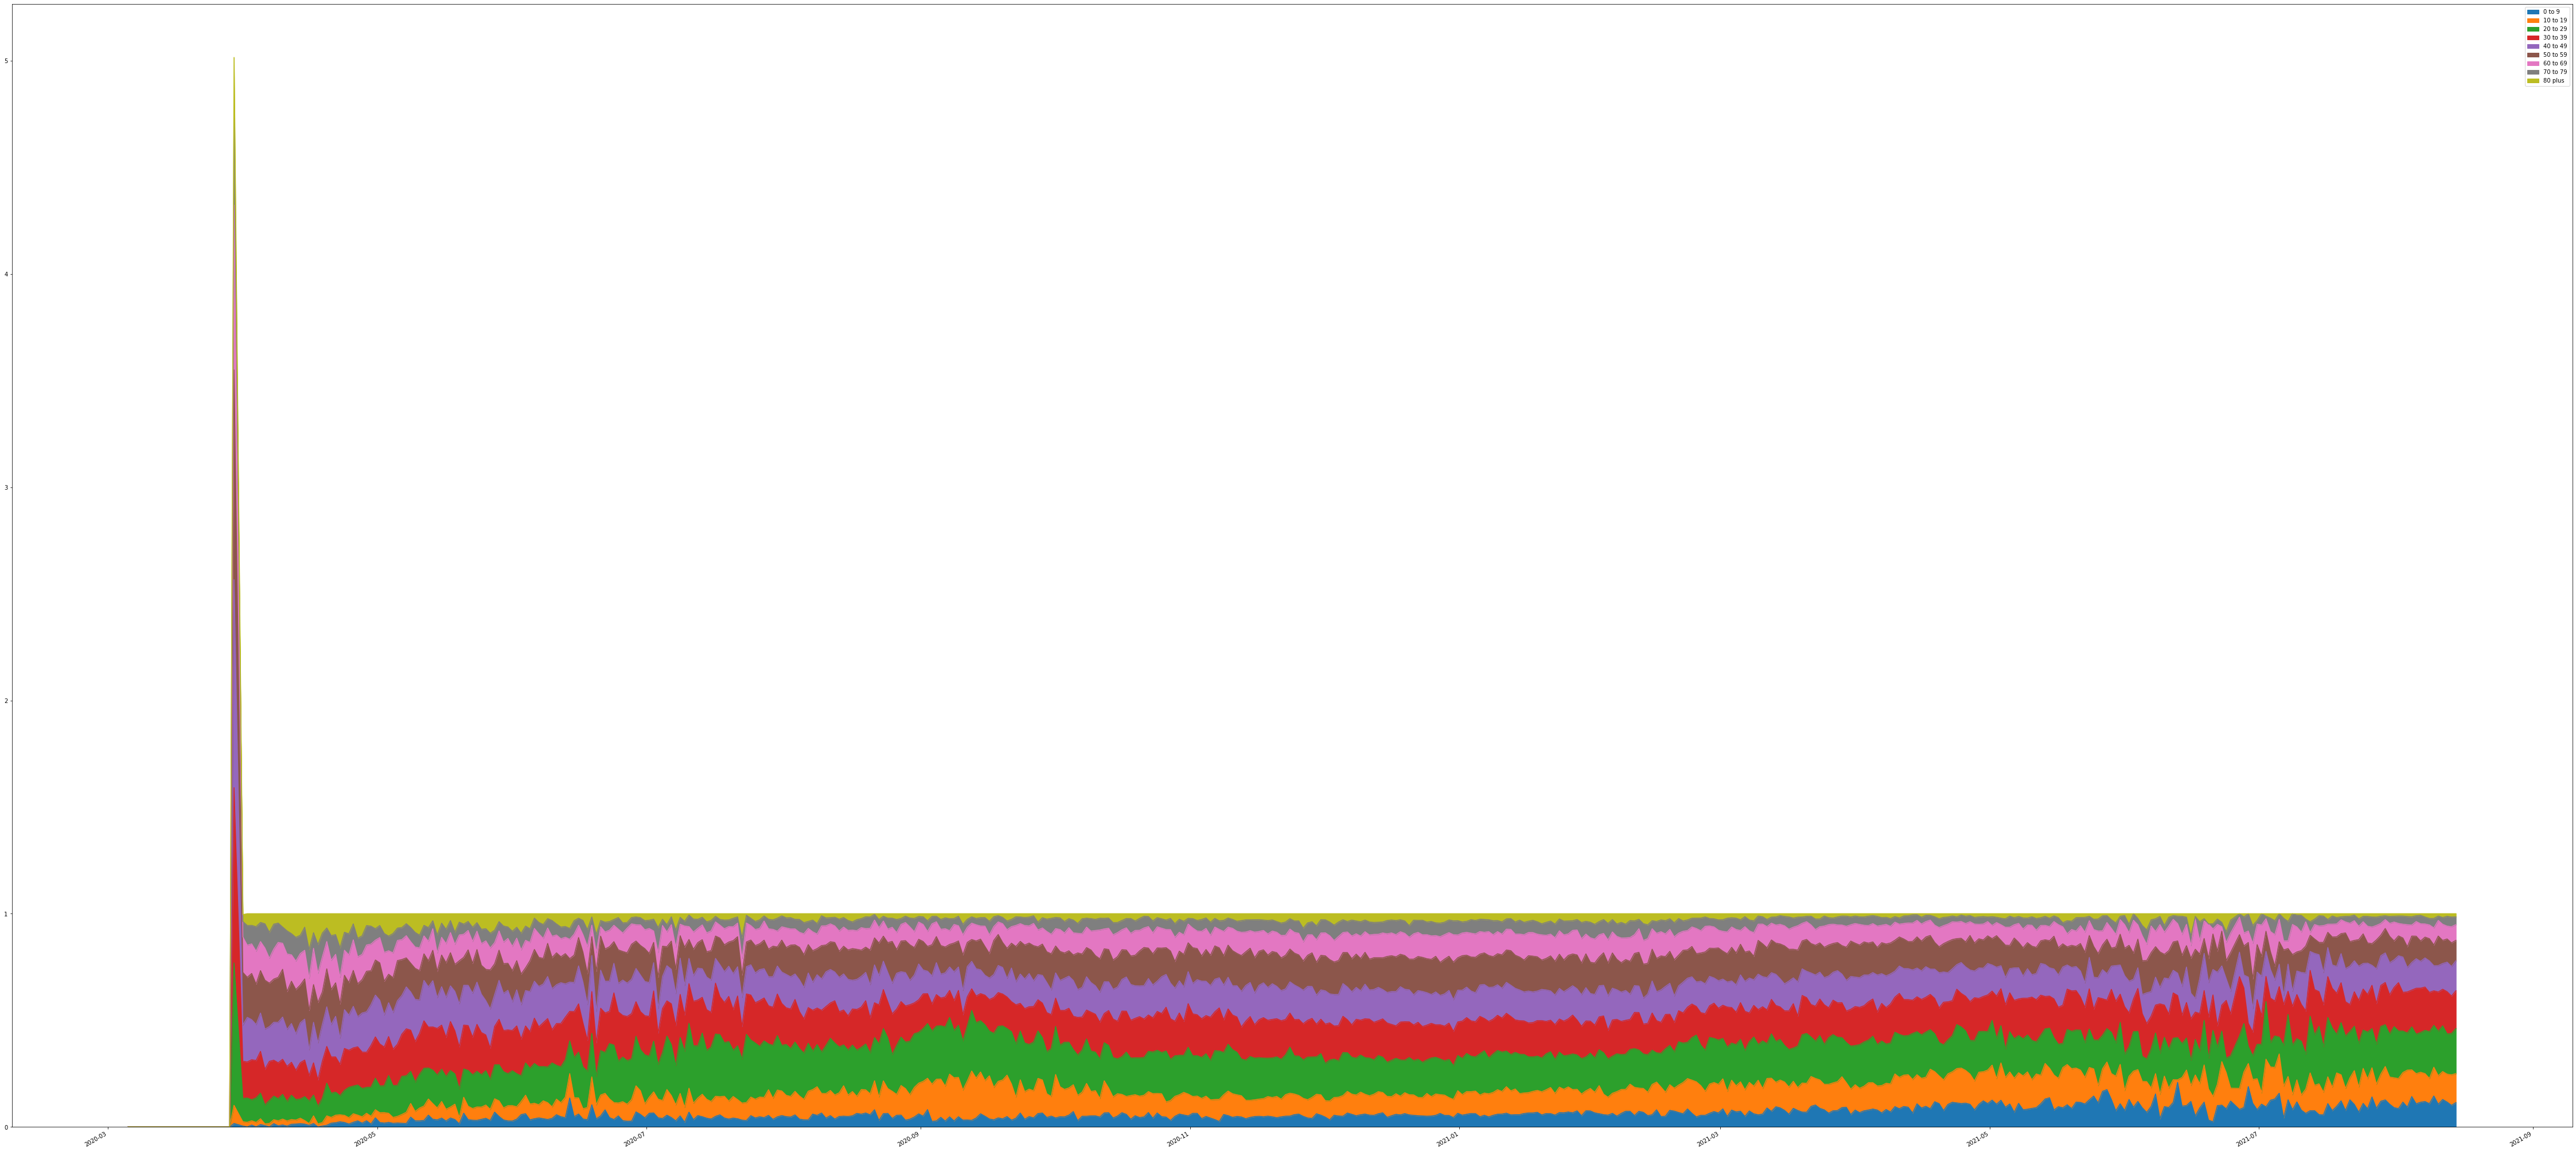

In [8]:
covdfp[covdfp["80 plus"] >= 0].plot.area(figsize=(80, 40))

## That's weird

In [9]:
covdfp[covdfp["80 plus"] >= 0].head(30).sum(axis=1)

2020-03-05 15:00:00    0.000000
2020-03-08 14:00:00    0.000000
2020-03-09 14:00:00    0.000000
2020-03-10 14:00:00    0.000000
2020-03-11 14:00:00    0.000000
2020-03-13 14:00:00    0.000000
2020-03-14 14:00:00    0.000000
2020-03-15 14:00:00    0.000000
2020-03-16 14:00:00    0.000000
2020-03-17 14:00:00    0.000000
2020-03-18 14:00:00    0.000000
2020-03-19 14:00:00    0.000000
2020-03-20 14:00:00    0.000000
2020-03-21 14:00:00    0.000000
2020-03-22 14:00:00    0.000000
2020-03-23 14:00:00    0.000000
2020-03-24 14:00:00    0.000000
2020-03-25 14:00:00    0.000000
2020-03-26 14:00:00    0.000000
2020-03-27 14:00:00    0.000000
2020-03-28 14:00:00    0.000000
2020-03-29 14:00:00    5.016194
2020-03-31 14:00:00    0.995951
2020-04-01 14:00:00    1.000000
2020-04-02 14:00:00    1.000000
2020-04-03 14:00:00    1.000000
2020-04-04 14:00:00    1.000000
2020-04-05 14:00:00    1.000000
2020-04-06 14:00:00    1.000000
2020-04-07 14:00:00    1.000000
dtype: float64

In [10]:
covdfp.loc['2020-03-29 14:00:00'].sum()

5.016194331983805

In [11]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp.sum(axis=1) > 0) & (covdfp["80 plus"] >= 0)]

0 to 9  10 to 19  20 to 29  30 to 39  40 to 49  \
2020-03-31 14:00:00  0.004049  0.020243  0.109312  0.174089  0.170040   
2020-04-01 14:00:00  0.000000  0.021538  0.113846  0.169231  0.209231   
2020-04-02 14:00:00  0.008671  0.020231  0.098266  0.187861  0.187861   
2020-04-03 14:00:00  0.000000  0.021077  0.114754  0.175644  0.168618   
2020-04-04 14:00:00  0.010899  0.027248  0.119891  0.196185  0.179837   
...                       ...       ...       ...       ...       ...   
2021-08-10 14:00:00  0.106518  0.133545  0.208267  0.184420  0.124006   
2021-08-11 14:00:00  0.128668  0.130926  0.214447  0.171558  0.120767   
2021-08-12 14:00:00  0.116523  0.130850  0.189112  0.197708  0.138491   
2021-08-13 14:00:00  0.101053  0.143158  0.193684  0.175789  0.138947   
2021-08-14 14:00:00  0.114173  0.135827  0.211614  0.177165  0.140748   

                     50 to 59  60 to 69  70 to 79   80 plus  
2020-03-31 14:00:00  0.246964  0.165992  0.072874  0.032389  
2020-04-01 14:00:00  0.187692  0.150769  0.092308  0.055385  
2020-04-02 14:00:00  0.216763  0.138728  0.086705  0.054913  
2020-04-03 14:00:00  0.189696  0.154567  0.114754  0.060890  
2020-04-04 14:00:00  0.198910  0.136240  0.089918  0.040872  
...                       ...       ...       ...       ...  
2021-08-10 14:00:00  0.138315  0.073132  0.020668  0.011129  
2021-08-11 14:00:00  0.108352  0.075621  0.031603  0.018059  
2021-08-12 14:00:00  0.108883  0.060172  0.045845  0.012416  
2021-08-13 14:00:00  0.110526  0.075789  0.045263  0.015789  
2021-08-14 14:00:00  0.095472  0.073819  0.036417  0.014764  

[467 rows x 9 columns]

<AxesSubplot:>

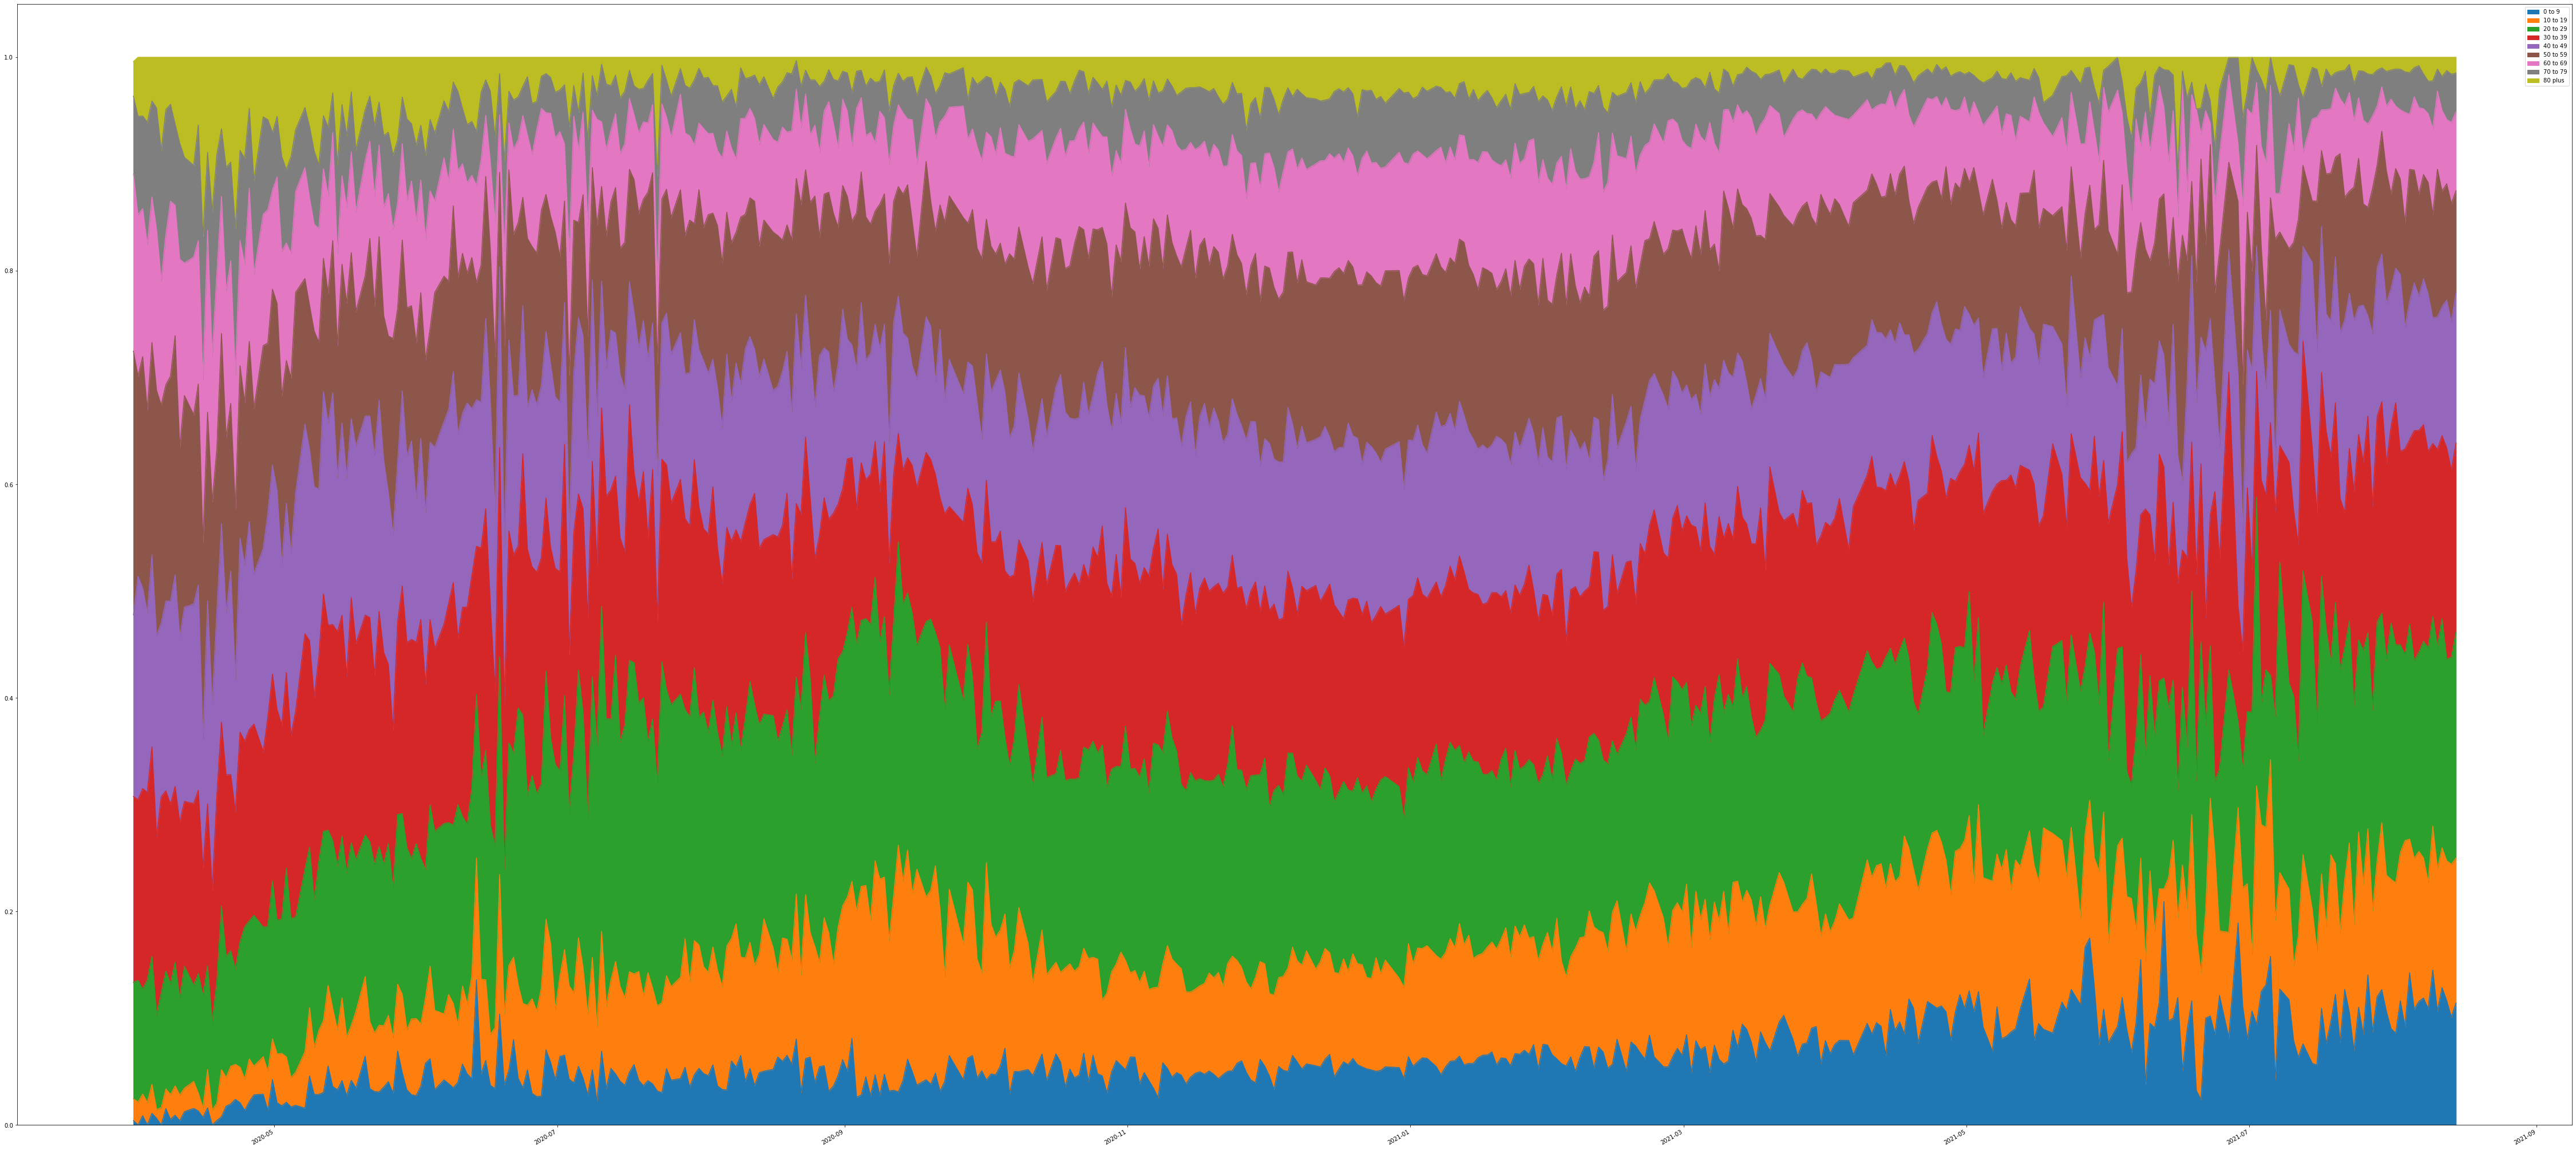

In [12]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp.sum(axis=1) > 0) & (covdfp["80 plus"] >= 0)].plot.area(figsize=(80, 40))

## That's better

But still noisy. Let's try a seven day rolling average.

In [13]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp.sum(axis=1) > 0) & (covdfp["80 plus"] >= 0)].rolling(7).mean()

0 to 9  10 to 19  20 to 29  30 to 39  40 to 49  \
2020-03-31 14:00:00       NaN       NaN       NaN       NaN       NaN   
2020-04-01 14:00:00       NaN       NaN       NaN       NaN       NaN   
2020-04-02 14:00:00       NaN       NaN       NaN       NaN       NaN   
2020-04-03 14:00:00       NaN       NaN       NaN       NaN       NaN   
2020-04-04 14:00:00       NaN       NaN       NaN       NaN       NaN   
...                       ...       ...       ...       ...       ...   
2021-08-10 14:00:00  0.120854  0.132121  0.199971  0.189914  0.131446   
2021-08-11 14:00:00  0.118885  0.132942  0.201829  0.189756  0.130199   
2021-08-12 14:00:00  0.120050  0.131451  0.202390  0.187234  0.130191   
2021-08-13 14:00:00  0.117954  0.131838  0.203414  0.182652  0.132064   
2021-08-14 14:00:00  0.117288  0.132503  0.204657  0.178973  0.132632   

                     50 to 59  60 to 69  70 to 79   80 plus  
2020-03-31 14:00:00       NaN       NaN       NaN       NaN  
2020-04-01 14:00:00       NaN       NaN       NaN       NaN  
2020-04-02 14:00:00       NaN       NaN       NaN       NaN  
2020-04-03 14:00:00       NaN       NaN       NaN       NaN  
2020-04-04 14:00:00       NaN       NaN       NaN       NaN  
...                       ...       ...       ...       ...  
2021-08-10 14:00:00  0.108904  0.068680  0.033377  0.014734  
2021-08-11 14:00:00  0.106705  0.072083  0.032342  0.015258  
2021-08-12 14:00:00  0.107171  0.070881  0.034972  0.015660  
2021-08-13 14:00:00  0.109317  0.070151  0.035820  0.016792  
2021-08-14 14:00:00  0.109022  0.071888  0.036378  0.016659  

[467 rows x 9 columns]

<AxesSubplot:>

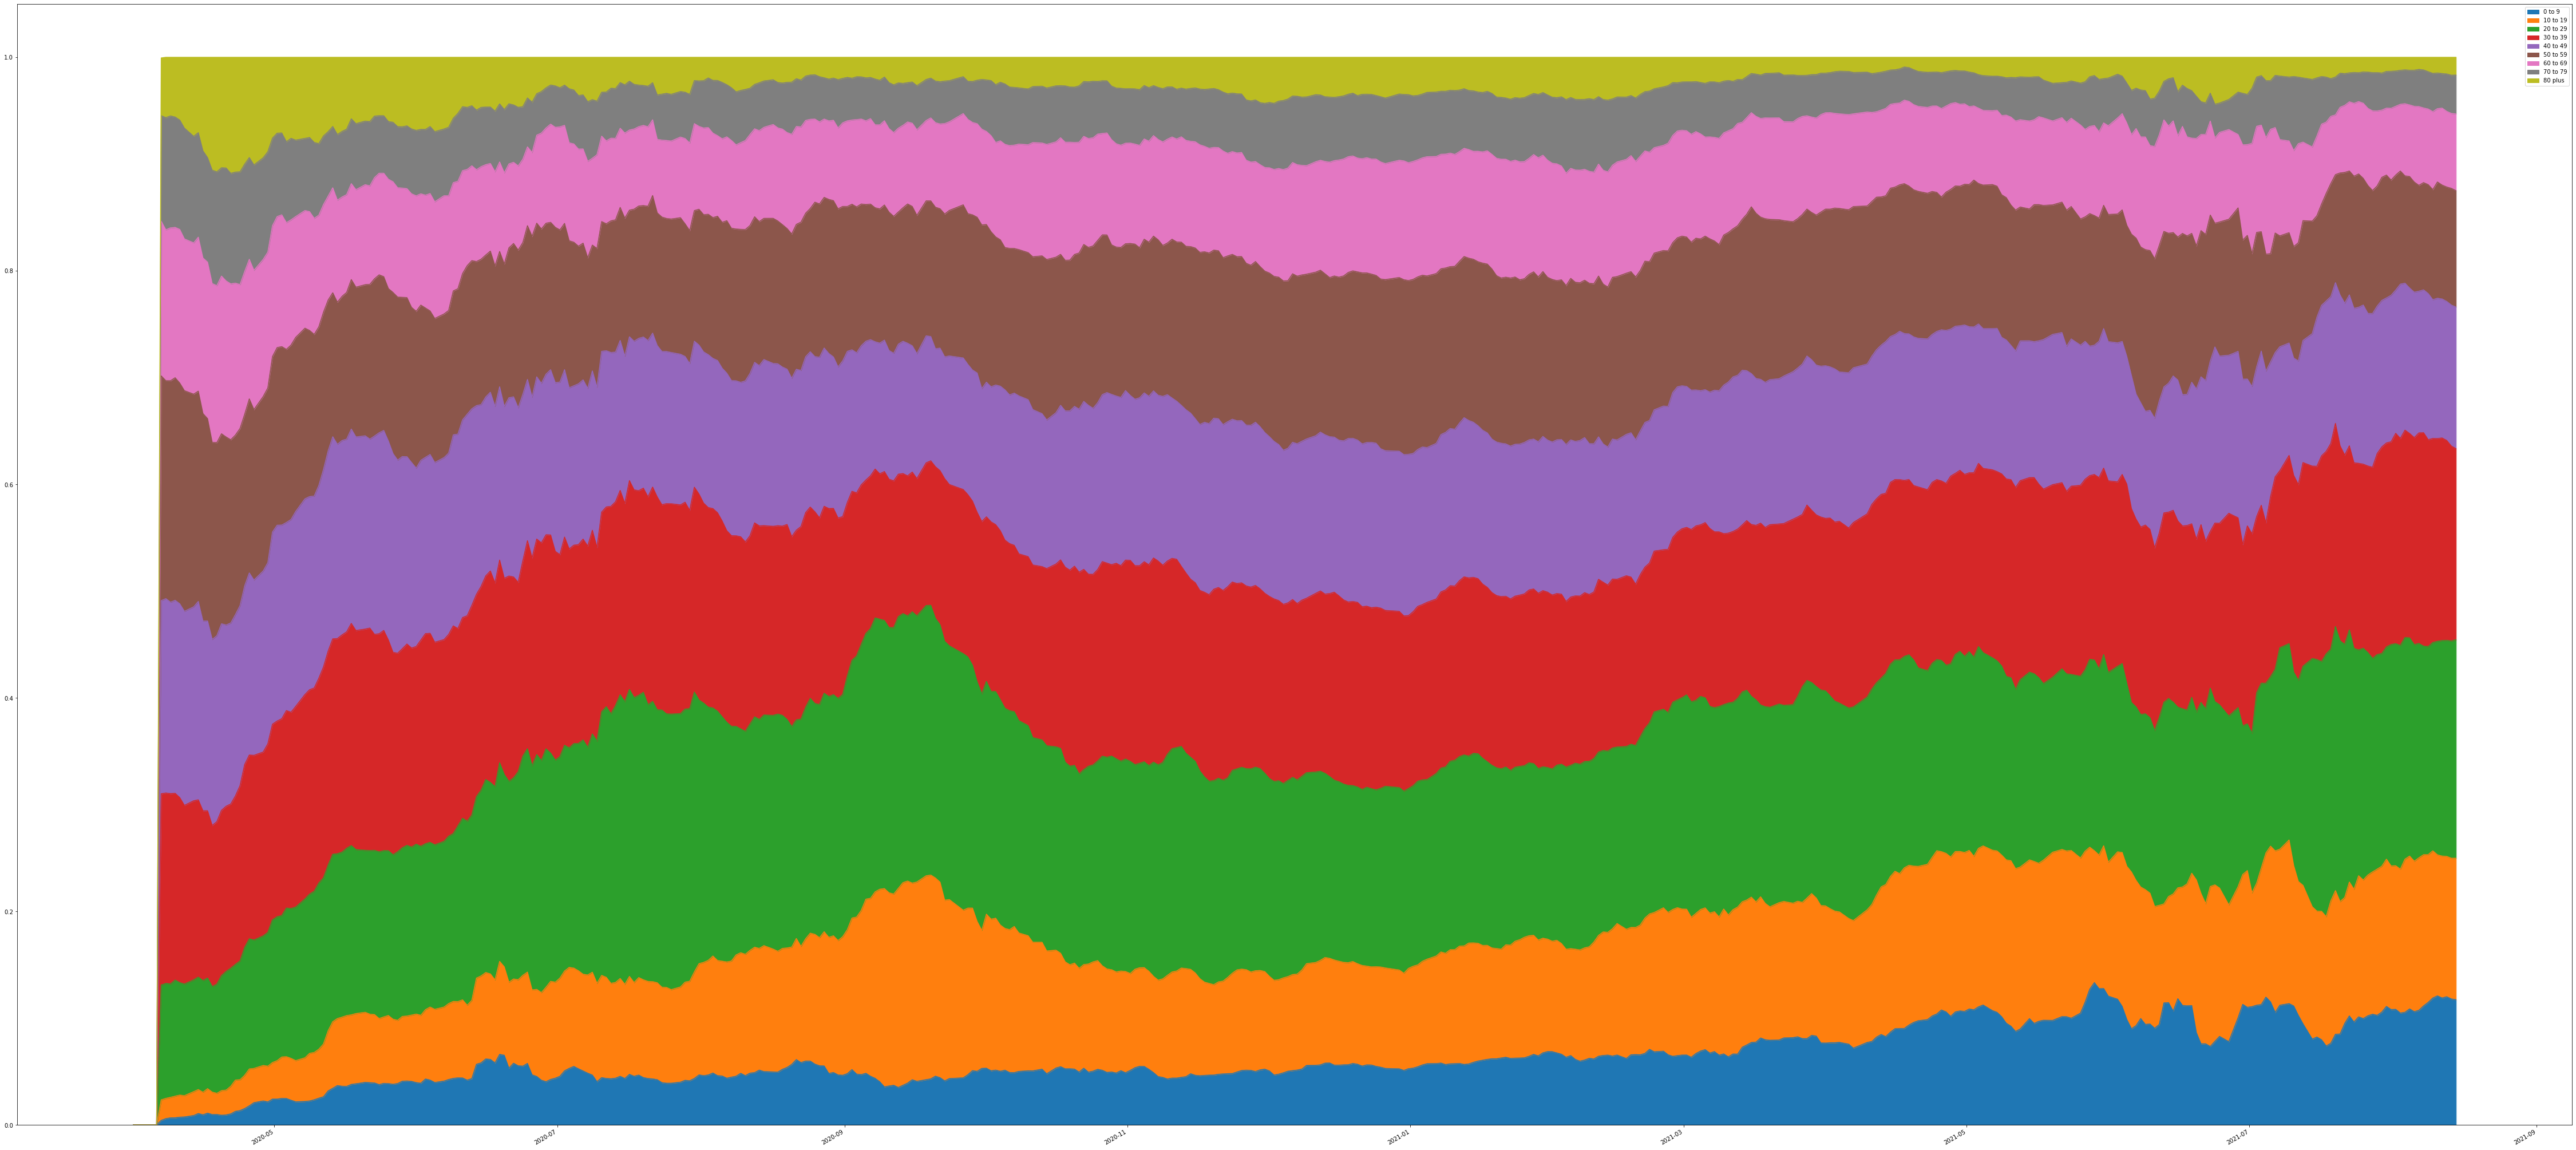

In [14]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp.sum(axis=1) > 0) & (covdfp["80 plus"] >= 0)].rolling(7).mean().plot.area(figsize=(80, 40))

## That is interesting. But...

It is easy see changes in the top and bottom age groups. But the middle groups are more difficult. Let's try a normal plot.

<AxesSubplot:>

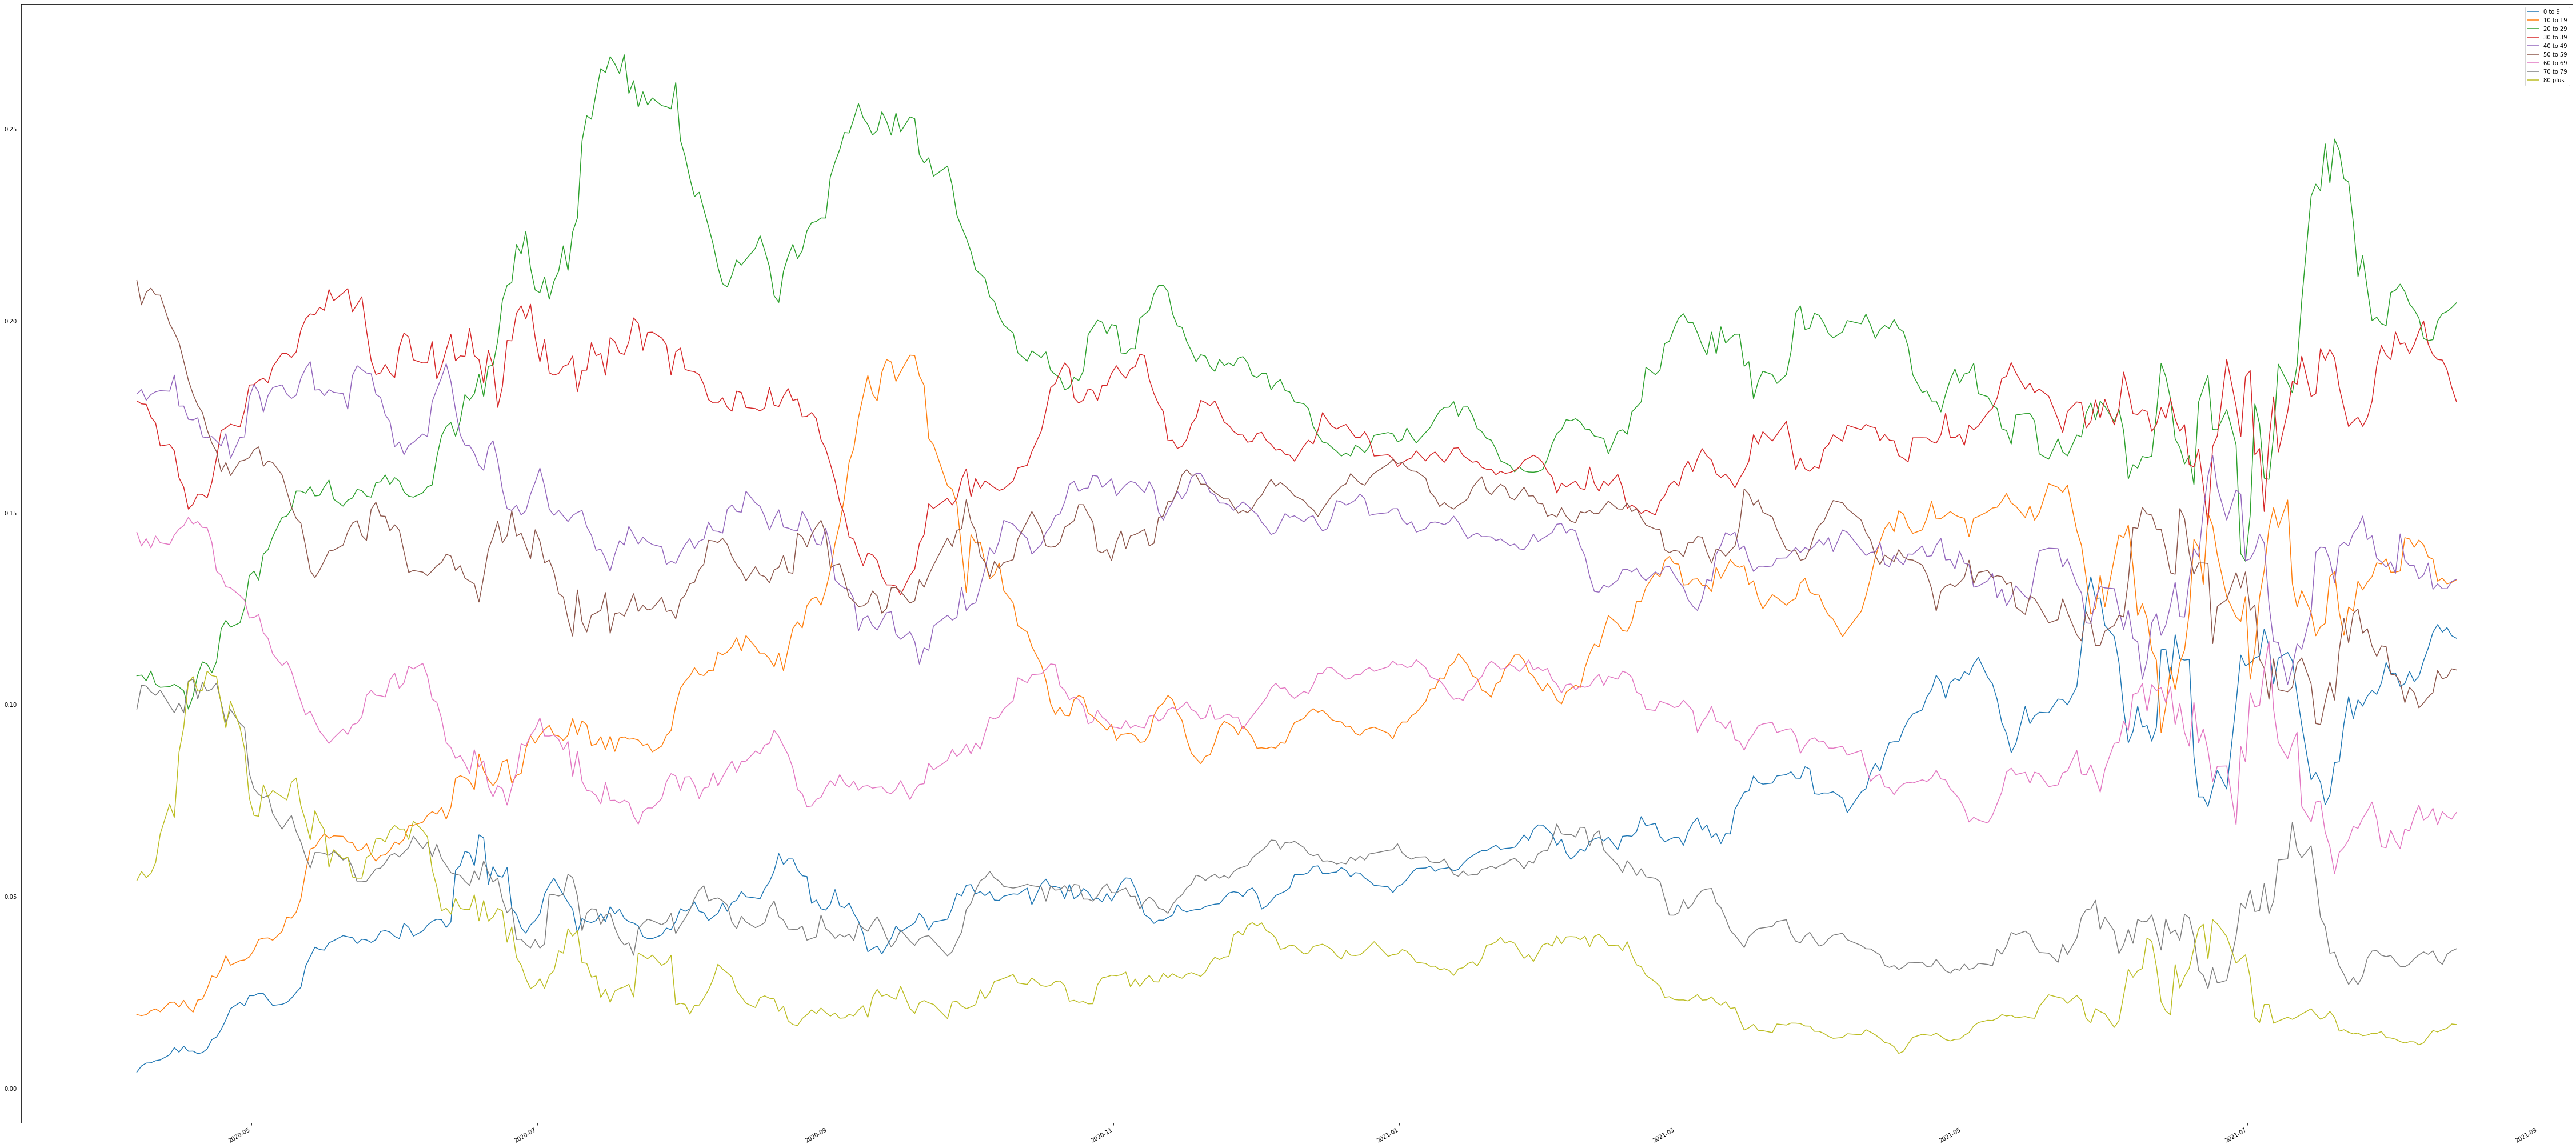

In [15]:
covdfp[(covdfp.sum(axis=1) <= 1) & (covdfp.sum(axis=1) > 0) & (covdfp["80 plus"] >= 0)].rolling(7).mean().plot(figsize=(80, 40))